## Función de correlación

In [4]:
import os
import numpy as np
from astroML.correlation import two_point
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm as tqdm

### Se crearán dos cubos de largo $l$, cada uno con $n$ elementos aleatorios.

In [91]:
a = np.load('prueba_250k.npy')
l = np.max(a)    #Largo del cubo
n = 20000        #número de partículas
dim = 3          #dimensiones
#r = 0.3
nr = 12
dr = 12

In [6]:
b = np.random.uniform(0,l,[n,dim])
r = np.arange(0,l-dr,l/nr)

In [7]:
def correlation(dd,rr):
    ki,kj=0,0
    f = np.zeros(len(r))
    c = r+dr
    for k in tqdm(range(len(r))):
        for i in range(n-1):
            for j in range(i+1,n):
                if r[k]<np.linalg.norm(dd[i]-dd[j])<c[k]:
                    ki+=1
                if r[k]<np.linalg.norm(rr[i]-rr[j])<c[k]:
                    kj+=1
        f[k] = (ki/kj)-1
        ki,kj=0,0
    #kk = ki+kj
    #for i in range(n):
        #for j in range(n):
            #if r<np.linalg.norm(dd[i]-rr[j])<c:
               # kk+=1
    return f                #(ki-2*kk+kj)/kj

In [8]:
%%time
z = correlation(a,b)


Wall time: 12h 46min 6s


## Algoritmo propio, con resultados para 20k datos.

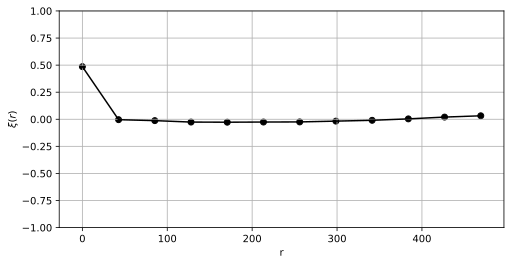

In [9]:
plt.rcParams['figure.figsize'] = (8,4)
#plt.errorbar(z, r, yerr=data[2], xerr = 0, fmt='o', color="black")
plt.plot(r, z,color="black")
plt.scatter(r, z,color="black")
plt.xlabel('r')
plt.ylabel(r'$\xi(r)$')
plt.ylim(-1, 1)
plt.grid()
plt.show()

## El tiempo de cálculo es excesivo para 20K datos, por lo que se usará la librería AstroML, cuyo algoritmo de partición de datos permite mayor velocidad en el cálculo.

In [92]:
bins = np.linspace(5, 200, 50)

In [93]:
%%time
corr = two_point(a, bins)
corr
r2corr = corr*(bins[:(len(bins)-1)]**2)

Wall time: 39min 48s


## Para 20K datos se tardó cerca de 20 minutos, mientras que para la correlación de 250K tardó cerca de 40 minutos, que son los resultados que se grafican a continuación. 

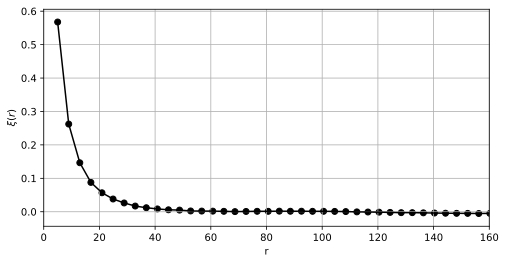

In [94]:
plt.rcParams['figure.figsize'] = (8,4)
#plt.errorbar(z, r, yerr=data[2], xerr = 0, fmt='o', color="black")
plt.plot(bins[:(len(bins)-1)], corr,color="black")
plt.scatter(bins[:(len(bins)-1)], corr,color="black")
plt.xlabel('r')
plt.ylabel(r'$\xi(r)$')
#plt.ylim(-1, 1)
plt.xlim(0, 160)
plt.grid()
plt.show()

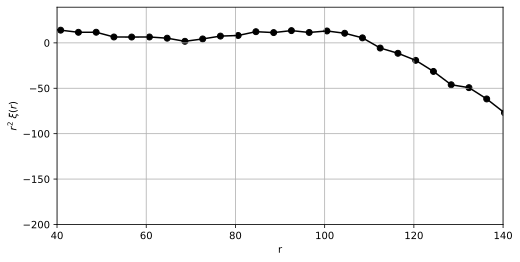

In [100]:
plt.rcParams['figure.figsize'] = (8,4)
#plt.errorbar(z, r, yerr=data[2], xerr = 0, fmt='o', color="black")
plt.plot(bins[:(len(bins)-1)], r2corr,color="black")
plt.scatter(bins[:(len(bins)-1)], r2corr,color="black")
plt.xlabel('r')
plt.ylabel(r'$r^2\; \xi(r)$')
plt.xlim(40, 140)
plt.grid()
plt.show()

In [99]:
dat = np.array([corr,bins[:(len(bins)-1)]])
np.save('coorel.npy', dat)